## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [65]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [66]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [67]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [68]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [69]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [70]:
# Checking the values in these two columns.
df.groupby('group')['landing_page'].value_counts()

group      landing_page
control    old_page        145274
           new_page          1928
treatment  new_page        145311
           old_page          1965
Name: landing_page, dtype: int64

In [71]:
# Number of times new page does not line up to treatment.
np_mask = df.query('landing_page == "new_page"')
value1 = np_mask.query('group != "treatment"').shape[0]

In [72]:
# Number of times treatment does not line up to new page.
tr_mask = df.query('group == "treatment"')
value2 = tr_mask.query('landing_page != "new_page"').shape[0]

In [73]:
# S: add up the two values above
value1 + value2

3893

f. Do any of the rows have missing values?

In [74]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [75]:
# Getting indexes of rows to drop.
drop1 = df.index[(df['group']=='treatment') & (df['landing_page']=='old_page')].tolist()
drop2 = df.index[(df['group']=='control') & (df['landing_page']=='new_page')].tolist()

In [76]:
# Dropping rows from above.
df2 = df.drop(drop1)
df2 = df2.drop(drop2)

In [77]:
# Checking the groupings make sense.
df2.groupby('group')['landing_page'].value_counts()

group      landing_page
control    old_page        145274
treatment  new_page        145311
Name: landing_page, dtype: int64

In [78]:
# Double checking that the rows have indeed been removed.  This should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [79]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [80]:
# Checking for repeat users.
df2.user_id.duplicated().sum()

1

In [81]:
# Locating repeat user.
df2.set_index('user_id').index.get_duplicates()

# Source: https://stackoverflow.com/questions/15247628/how-to-find-duplicate-names-using-pandas

[773192]

c. What is the row information for the repeat **user_id**? 

In [82]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [83]:
df2 = df2.drop([1899])

In [84]:
# Ensuring duplicate user_id is removed.
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [85]:
conv = df2.converted.mean()

conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [86]:
df2[df2['group'] == "control"].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [87]:
df2[df2['group'] == "treatment"].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [88]:
df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

*****
CONCLUSION:

The probabilities that the user converted for both the treatment and control groups are very close (after rounding, both are 0.12), and the individuals tested had a 50% chance of receiving the treatment page.  The information suggests that there is no evidence one page leads to more conversions.
*****

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

*****
ANSWER:

H0 : Pold ≥ Pnew


H1 : Pnew < Pold
*****


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [89]:
p_new = conv
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [90]:
p_old = conv
p_old

0.11959708724499628

c. What is $n_{new}$?

In [91]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [92]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [93]:
new_page_converted = np.random.binomial(1, p_new, n_new)

In [94]:
new_page_converted.mean()

0.11987475053334251

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [95]:
old_page_converted = np.random.binomial(1, p_old, n_old)

In [96]:
old_page_converted.mean()

0.1196291146385451

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [97]:
new_diff = new_page_converted.mean() - old_page_converted.mean()
new_diff

0.00024563589479741077

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [98]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_new_mean = new_page_converted.mean()
    p_old_mean = old_page_converted.mean()
    p_diffs.append(p_new_mean - p_old_mean)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

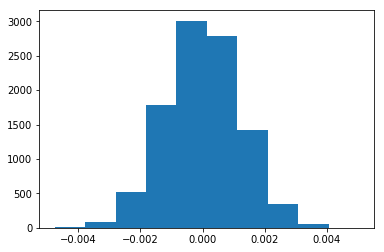

In [99]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [100]:
obs_diff = df2[df2['group'] == "treatment"].converted.mean() - df2[df2['group'] == "control"].converted.mean()

obs_diff

-0.0015782389853555567

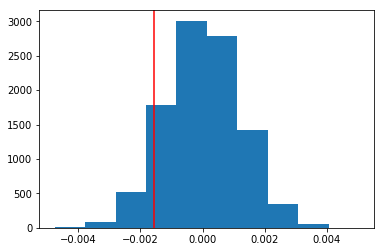

In [101]:
plt.hist(p_diffs);

plt.axvline(obs_diff, c='red')

In [102]:
# Compute p value.
(p_diffs > obs_diff).mean()

0.91279999999999994

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

*****

ANSWER:

This is the p-value.  Because it's large (more than a p-critical of 0.05 and a confidence interval of 95%), we fail to reject the null hypothesis.  This means that it is likely that the old page is the same as or better than the new page in terms of converting users.

*****


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [103]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [104]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])

In [105]:
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

In [106]:
from scipy.stats import norm

norm.cdf(z_score)

0.90505831275902449

In [107]:
# This is the critical value at 95% confidence.

norm.ppf(1-(0.05/2)) 

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

*****

ANSWER:

Since the z-score does not exceed the critical value, we fail to reject the null hypothesis.  This agrees with earlier findings.


****

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

*****

ANSWER:

Because the response variable is categorical--either conversion or no conversion--we can use logistic regression.

*****

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [108]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [109]:
df2['intercept'] = 1

group_dummies = pd.get_dummies(df['group'])
df2 = df2.join(group_dummies)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [110]:
df2 = df2.rename(columns={'treatment': 'ab_page'})

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [111]:
import statsmodels.api as sm;

log_mod= sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [112]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        00:29:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

*****

ANSWER:

The p-value associated with ab_page is 0.190.

The p-values are different because they are calculated a little differently in each part.  The first p-value that was calculated was derived from differences in means that involved random sampling and a binomial simulation.  In the regression approach, the p-value is derived from fitting a regression line that describes the relationship between the explanatory and response variables using the least-squares algorithm.

Also consider the null and alternative hypotheses for each section:
For the first experiment, under the null hypothesis, we assume that the old page is better or is as good as the new page. The alternative hypothesis on the other hand states the new page is better than the old one.

For the second experiment, we can understand the null and alternative hypothesis in terms of linear relationships between the variables.  The null assumes that there is no relationship between conversion and treatment/control pages and the slope is equal to zero. The alternative hypothesis, says that there is a relationship between these two variables and the slope does not equal zero.

The p-value is related to the null and alternative hypothesis because it is a measure of the strength of the evidence.   Under a 95% confidence interval, p-values less than or equal to 0.05 indicates strong evidence against the null and suggests we should reject it.  P-values higher than 0.05 indicates weak evidence against the null so we fail to reject it.

Sources:
- http://www.biostathandbook.com/multipleregression.html
- dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data


*****



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

*****

ANSWER:

It's a good idea to consider other factors into the regression model in case there are other explanatory variables that may be more correlated with the response variable.  However, there are some disadvantages to adding additional terms into regression models.  One of these disadvantages is multicollinearity which happens when x-variables are related to one another.  With multicollinearity, the results may not be what we expect and may be unreliable.

*****

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [113]:
df_countries = pd.read_csv('countries.csv')

df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [114]:
df_countries.user_id.duplicated().sum() # Checking for duplicates

0

In [115]:
df_countries.isnull().values.any() # Checking for null values

False

In [116]:
df3 = df2.set_index('user_id').join(df_countries.set_index('user_id'))

In [117]:
df3.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US


In [118]:
df3.country.value_counts() # Checking to see how many different countries there are.

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [119]:
country_dummies = pd.get_dummies(df3['country'])
df3_new = df3.join(country_dummies)

In [120]:
df3_new.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1


In [121]:
lm = sm.Logit(df3_new['converted'], df3_new[['intercept','CA', 'UK']])
results2 = lm.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:               1.521e-05
Time:                        00:29:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [122]:
np.exp(results2.params) # Exponentiating results.

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64

*****

CONCLUSION:

The p-values suggest that the country a user is from does not have a statistically significant impact on conversion.  In interpreting the coefficients, we can conclude the following:

A user from Canada is 0.996 times as likely as a user from the US to convert holding all else constant.

A user from the UK is 1.001 times as likely as a uer from the US to convert holding all else constant.

*****



h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [123]:
#here
df3_new['UK_abpage'] = df3_new['UK']*df3_new['ab_page']
df3_new['US_abpage'] = df3_new['US']*df3_new['ab_page']
df3_new['CA_abpage'] = df3_new['US']*df3_new['ab_page']
df3_new.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US,UK_abpage,US_abpage,CA_abpage
user_id,,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1,0,1,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1,0,1,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1,0,0,0


In [124]:
lm2 = sm.Logit(df3_new['converted'], df3_new[['intercept', 'UK_abpage', 'CA_abpage']])
results3 = lm2.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:               1.082e-05
Time:                        00:29:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
UK_abpage      0.0112      0.018      0.626      0.532      -0.024       0.046
CA_abpage     -0.0144      0.012     -1.155      0.248      -0.039       0.010
==============================================================================
"""

In [125]:
np.exp(results3.params) # Exponentiating results.

intercept    0.136338
UK_abpage    1.011292
CA_abpage    0.985679
dtype: float64

*****

CONCLUSION:

We can make the following conclusions:

A user from Canada given the treatment page is 0.986 times as likely as a user from the US given the treatment page to convert, holding all else constant.

A user from the UK given the treatment page is 1.001 times as likely as a user from the US given the treatment page to convert, holding all else constant.  

The p-value for the two coefficients are larger than 0.05 which indicates that we fail to reject the null, suggesting that the old page is better than or as effective as the new page.  The information provided suggests the probability of conversion considering the variables of country and page type is neither statistically nor practically significant.



*****

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [126]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0